# Lesson 9 - Modeling
Welcome to the Modeling. In this lesson we will be covering: 
- **What is modeling**
- **How does modeling differ from algorithms**
- **Types of Models** 
- **Sklearn Library**
- **Building towards a model**
- **Modeling**

The lab for Lesson 9 will consist of all the exercises throughtout the notebook. 

For this lesson we will again be using the Titanic Survival Dataset from Kaggle to predict survival of passengers.

Let's review the column values once more as a reminder of the data we are using:

- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain ?)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin**: Cabin number of the passenger (Some entries contain ?)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)
- **Boat**: Lifeboat (if survived)
- **Body**: Body Number (if did not survive and body was recovered)
- **Home.Dest**: Home / Destination

## Sklearn Library 

In [485]:
# If you do not have the Scikit-learn, please install using the following command. 
# If you do not need to, then you can skip this step
!conda install -c anaconda scikit-learn

## Building your model ML - End to End

In our lab today, we will go through end to end of the machine learning process to reiterate concepts we have learned, and then discuss ones that we learned today. 

Lets start with importing our libraries....

In [486]:
# Exercise 1
# Import the pandas library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

### Read in your data

In [487]:
# Exercise 2 read in the titanic dataset 

titanic_data = pd.read_csv("titanic_data.csv")
titanic_data.head(n=5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


### Explore the Data

We will now explore our data to get a feel of what we are dealing with. Remember this is typically the first step of the process, if you do not understand your data, then you will not be able to predict with your data.

In [488]:
# Exercise 3 - Show the column types of the Titanic Data set
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [489]:
#First we must group the dataset by Pclass and Survived to gather the total count
group = titanic_data.groupby(['pclass', 'survived'])
pclass_survived = group.size().unstack()


# Creating a histogram of age by survival
hist = px.histogram(titanic_data,x = "age", opacity = 0.7, color = "survived")
hist

**Exercise 4** - How else could we explore the data?

(Double Click Here) Answer:

In [490]:
# Bonus - Try exploring another feature from the titanic dataset


Below I will demonstrate how I explored the data.The first thing you will notice is that I created two list:

- categorical columns 
- numerical columns

I do this, to make it easier for me to access columns from these groups and if I need to apply any transformations

In [491]:
categorical_columns = ["name","sex","cabin","embarked", "home.dest"]
numerical_columns = ["pclass","survived","age","sibsp","parch","ticket","fare"]

Now I will look at the values from my categorical columns

In [492]:
for column in categorical_columns:
    print("-----------------------------")
    print("For column {}, the values are: \n{} \n".format(column, titanic_data[column].value_counts()))
    print("-----------------------------")

-----------------------------
For column name, the values are: 
Kelly, Mr. James                 2
Connolly, Miss. Kate             2
Attalah, Miss. Malake            1
Cribb, Mr. John Hatfield         1
Daly, Mr. Peter Denis            1
                                ..
Parr, Mr. William Henry Marsh    1
Slocovski, Mr. Selman Francis    1
Carrau, Mr. Francisco M          1
Spedden, Mr. Frederic Oakley     1
Lievens, Mr. Rene Aime           1
Name: name, Length: 1307, dtype: int64 

-----------------------------
-----------------------------
For column sex, the values are: 
male      843
female    466
Name: sex, dtype: int64 

-----------------------------
-----------------------------
For column cabin, the values are: 
?                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
C22 C26               4
                   ... 
B80                   1
B79                   1
C91                   1
B50                   1
D46                   1
Name

**Exercise 4** - What can you understand from the above `value_counts()`? Do you see alot of people from NY or does everyone have the same name? Describe what you see.

(Double Click Here) Answer:

Now lets take a look at how our numerical values are distributed

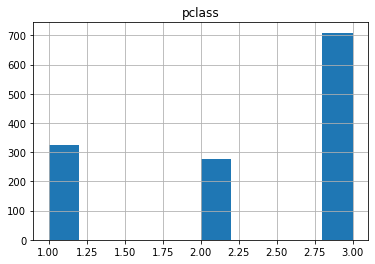

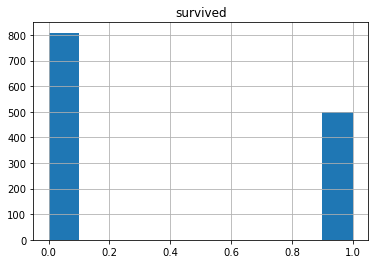

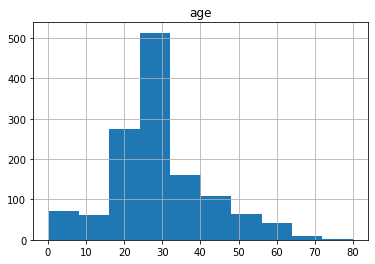

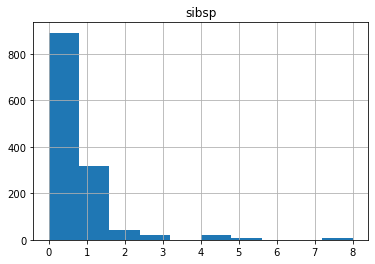

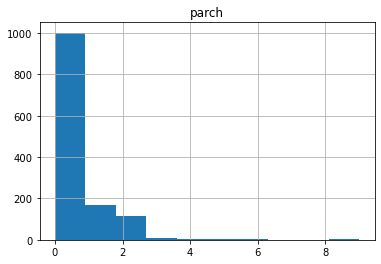

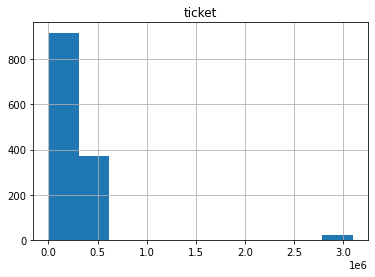

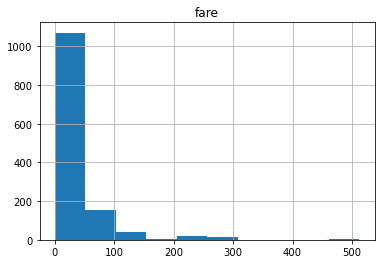

In [493]:
for col in numerical_columns:
    titanic_data_final.hist(column=col)

**Exercise 5** - Do you believe any of the numerical values will have an effect on our model?

(Double Click Here) Answer:

### Prepare The data

Next step is to start preparing our data. Here we will transform columns or clean up the data before we begin to feature engineer any new columns. 

Lets start with replacing our good ole friend the "?", so that we can decide how to replace missing values later.

In [494]:
titanic_data = titanic_data.replace({'?': None})
titanic_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,None,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,None,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,None,None,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,None,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,None,None,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,None,C,None,328,None
1305,3,0,"Zabour, Miss. Thamine",female,None,1,0,2665,14.4542,None,C,None,None,None
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,None,C,None,304,None
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,None,C,None,None,None


Lets count how many missing values we currently have

In [495]:
titanic_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In the step below we can see where I use the list of numerical columns to convert them all to numeric. You could have typed each individual column out, but this way you save time and can focus at the task at hand.

In [496]:
# Convert numeric columns to numeric
titanic_data[numerical_columns] = titanic_data[numerical_columns].apply(pd.to_numeric, errors='coerce')

In the next step I shorten the cabin values to only the cabin letter and not the number. I am doing this to make our next steps easier, but we are losing information that could be important.

In [497]:
titanic_data["cabin"] = titanic_data["cabin"].str[0]

### Feature Engineering 

As discussed in our previous lesson, Feature engineering is used to enhance our data to draw more insights. Here we will transform stings to numbers, potentially remove missing data, one hot encode data, etc.

In [498]:
# Label Encoding cabin
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}
titanic_data["cabin"] = titanic_data["cabin"].map(deck)

In [499]:
# One hot encoding sex
titanic_data = pd.get_dummies(titanic_data,columns= ["sex"], prefix="gender")
titanic_data

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,gender_female,gender_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160.0,211.3375,2.0,S,2,None,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781.0,151.5500,3.0,S,11,None,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781.0,151.5500,3.0,S,None,None,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781.0,151.5500,3.0,S,None,135,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781.0,151.5500,3.0,S,None,None,"Montreal, PQ / Chesterville, ON",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",14.5000,1,0,2665.0,14.4542,NaN,C,None,328,None,1,0
1305,3,0,"Zabour, Miss. Thamine",NaN,1,0,2665.0,14.4542,NaN,C,None,None,None,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",26.5000,0,0,2656.0,7.2250,NaN,C,None,304,None,0,1
1307,3,0,"Zakarian, Mr. Ortin",27.0000,0,0,2670.0,7.2250,NaN,C,None,None,None,0,1


In the cell below I am implementing a feature engineering technique called **target mean encoding**. We will only glance at the code, but I wanted to give you a demonstration of more complex techniques that are used in industry 

In [500]:
target_mean = titanic_data["survived"].mean()
embarked_agg = titanic_data.groupby("embarked")["survived"].agg(['count','mean'])
counts = embarked_agg['count']
means = embarked_agg['mean']
target_mean = (counts * means + 100 * means)/(counts + 100)
titanic_data["embarked"] = titanic_data["embarked"].map(target_mean)

Now lets deal with our missing data. 

In [501]:
titanic_data.isnull().sum()

pclass              0
survived            0
name                0
age               263
sibsp               0
parch               0
ticket            352
fare                1
cabin            1014
embarked            2
boat              823
body             1188
home.dest         564
gender_female       0
gender_male         0
dtype: int64

As we can see above we have alot of missing values. Our dataset has about 1309 values, and we have cabin and body with more than 1000 values missing. It is here where we can validate if dropping values or imputing will make a difference in our final results. In the cell below, add or remove columns you believe will affect our model due to missing values.

In [502]:
# Here we will drop columns we deem unnecessary. Remember this spot as we will come back 
# Exercise 6 -  specify columns to drop
titanic_data = titanic_data.drop(columns=["body", "name","home.dest","boat"])

Now that we have removed columns that we have deemed unnecessary, lets fill in values using one of the following:

- **mean**: replace missing values using the mean along each column. Can only be used with numeric data.

- **median**: replace missing values using the median along each column. Can only be used with numeric data.

- **most_frequent**: replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.

- **constant**:  replace missing values with fill_value. Can be used with strings or numeric data.

We will be using the `SimpleImputer` method from the sklearn library 

In [503]:
# Exercise 7 - specify a method for filling in missing data 
from sklearn.impute import SimpleImputer
# specify method below after strategy=. Mean will be the default value 
imp = SimpleImputer(strategy="mean")
imp.fit(titanic_data)
titanic_data_final = imp.transform(titanic_data)
titanic_data_final = pd.DataFrame(titanic_data_final, columns=titanic_data.columns)
titanic_data_final

,pclass,survived,age,sibsp,parch,ticket,fare,cabin,embarked,gender_female,gender_male
0,1.0,1.0,29.000000,0.0,0.0,24160.0,211.3375,2.000000,0.332604,1.0,0.0
1,1.0,1.0,0.916700,1.0,2.0,113781.0,151.5500,3.000000,0.332604,0.0,1.0
2,1.0,0.0,2.000000,1.0,2.0,113781.0,151.5500,3.000000,0.332604,1.0,0.0
3,1.0,0.0,30.000000,1.0,2.0,113781.0,151.5500,3.000000,0.332604,0.0,1.0
4,1.0,0.0,25.000000,1.0,2.0,113781.0,151.5500,3.000000,0.332604,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,14.500000,1.0,0.0,2665.0,14.4542,3.362712,0.555556,1.0,0.0
1305,3.0,0.0,29.881135,1.0,0.0,2665.0,14.4542,3.362712,0.555556,1.0,0.0
1306,3.0,0.0,26.500000,0.0,0.0,2656.0,7.2250,3.362712,0.555556,0.0,1.0
1307,3.0,0.0,27.000000,0.0,0.0,2670.0,7.2250,3.362712,0.555556,0.0,1.0


In [505]:
# Rounding the cabin value if we did not drop it
if "cabin" in titanic_data.columns:
    titanic_data_final['cabin'] = round(titanic_data_final['cabin'])
    titanic_data_final


Now lets check our results

In [506]:
titanic_data_final.isnull().sum()

pclass           0
survived         0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin            0
embarked         0
gender_female    0
gender_male      0
dtype: int64

## Modeling

We went over all of the above to emphasize that without good data, we do not have a good model. All of the above is part of the modeling process. 

Now that we have our **final titanic  dataset** ready we can now approach the steps to model our data. 

### Types of Modeling
As mentioned from the lecture we have:

- Unsupervised Models
    - Clustering
    - Dimensionality Reduction
- Supervised Models
    - Regression
    - Classification

We are focusing on the supervised models.

**Classification**: Models are used to classify your target variable. Such as, predict what color my shirt is, or predict if a transaction is fradualent or not. Classification is used to determine a label

**Regression**: Models are used to predict values. Such as Predict the stock price for Apple tomorrow, or predict my yearly income for next year. 

Each both have various specific models under each of them. A few of them are Neural Networks, LSTMS, RandomForrest, XGBoost, DecesionTrees, PCA, K-Means and various others. All these model have the advantages, disadvantages, and specific uses, but we will go over these in another lesson. If you would like to get a head start, you can take a look at the [sklearn documentation](https://scikit-learn.org/stable/user_guide.html)

### Specify Target Variable

The first step is to remove our value that we aim to predict. We do this because then the model will have no way to know what we are asking of it. If we did not specify our target variable, it would be similiar to expecting ice cream, without asking for it. 

In [446]:
target = titanic_data_final["survived"]

### Specify the features

After specifying the target variable, we now drop it from the titanic_daata_final, so then we can have a dataset of just our features. What are features? 

**Features:** Measurable values to be analyzed. 

An easier way to understand features is to imagine them as the inputs(columns) to an algorithm that helps make the decisions or path to take

In [447]:
features = titanic_data_final.drop('survived', axis = 1)

### Lets check what could be good features
Now that we have our features we could use modeling to help us decide which features to use in our final model. We will not go over the code below in detail, but we will use the graph to see what might be good features to use.

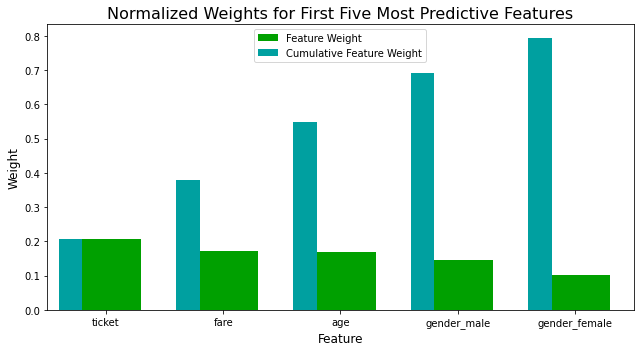

In [516]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
model = RandomForestClassifier()

model.fit(X_train, y_train)

feature_weights = model.feature_importances_
feature_weights

# Show top 5 features 
indices = np.argsort(feature_weights)[::-1]
columns = X_train.columns.values[indices[:5]]
values = feature_weights[indices][:5]

# Creat the plot
fig = plt.figure(figsize=(9, 5))
plt.title("Normalized Weights for First Five Most Predictive Features", fontsize=16)
plt.bar(np.arange(5), values, width=0.6, align="center", color='#00A000', \
       label="Feature Weight")
plt.bar(np.arange(5) - 0.3, np.cumsum(values), width=0.2, align="center", color='#00A0A0', \
       label="Cumulative Feature Weight")
plt.xticks(np.arange(5), columns)
plt.xlim((-0.5, 4.5))
plt.ylabel("Weight", fontsize=12)
plt.xlabel("Feature", fontsize=12)

plt.legend(loc='upper center')
plt.tight_layout()
plt.show()  

**Exercise 8:** What features appeared for you? Why do you believe they were your top features?

(Double Click Here) Answer:

### Split Data into Train and Test
Before we submit out featres and target to a model, we first need to split our data into a test set and a training set. We split our data into test/train, because if we were to train our model with the complete dataset, how could we test our model? How could we know if our model is better than just guessing. 

By splitting the data we are providing a system of checks and balances, so that if we were to use this model in real life, we could verify our model to more than what is included in our dataset. 

We will use the `train_test_split` method from the sklearn library to split our data 70% training and 30% testing. You can play with this to see how your results vary. Just change the **test_size** input to a decimal value from .1-.9

In [517]:
# Split the data into train and test. 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

#### Lets take a quick look at our train features values

In [518]:
X_train.head()

,pclass,age,sibsp,parch,ticket,fare,cabin,embarked,gender_female,gender_male
1214,3.0,29.881135,0.0,0.0,315037.000000,8.6625,3.0,0.332604,0.0,1.0
677,3.0,26.000000,0.0,0.0,349224.000000,7.8958,3.0,0.332604,0.0,1.0
534,2.0,19.000000,0.0,0.0,250655.000000,26.0000,3.0,0.332604,1.0,0.0
1174,3.0,29.881135,8.0,2.0,249039.136886,69.5500,3.0,0.332604,1.0,0.0
864,3.0,28.000000,0.0,0.0,347086.000000,7.7750,3.0,0.332604,1.0,0.0


#### Lets take a quick look at our train target values

In [519]:
y_train.head()

1214    0.0
677     0.0
534     1.0
1174    0.0
864     0.0
Name: survived, dtype: float64

### Create the Model

We are finally at the step to creating our model. As this will be your second time viewing a model, we will mainly use the default settings. Models typically have a variety of levers that can be used, but we will cover this in another lesson.

In [520]:
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# Define the classifier, and fit it to the data. Here we are creating a variable type of the DecisionTreeClassifier
# that we will use to perform actions with. 
model = DecisionTreeClassifier()

If you would like to see all of the actions that you can take with [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) follow the link

### Train the model
We will now train our model. Taining our model will use our training set created from `train_test_split`. This step can be viewed as teaching our model. The model than stores memory as weights, which will then be used for prediction

In [521]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier()

Below is a graph of how are model made decisions. As you can see it made lots of decisions based off of the data we provided. 

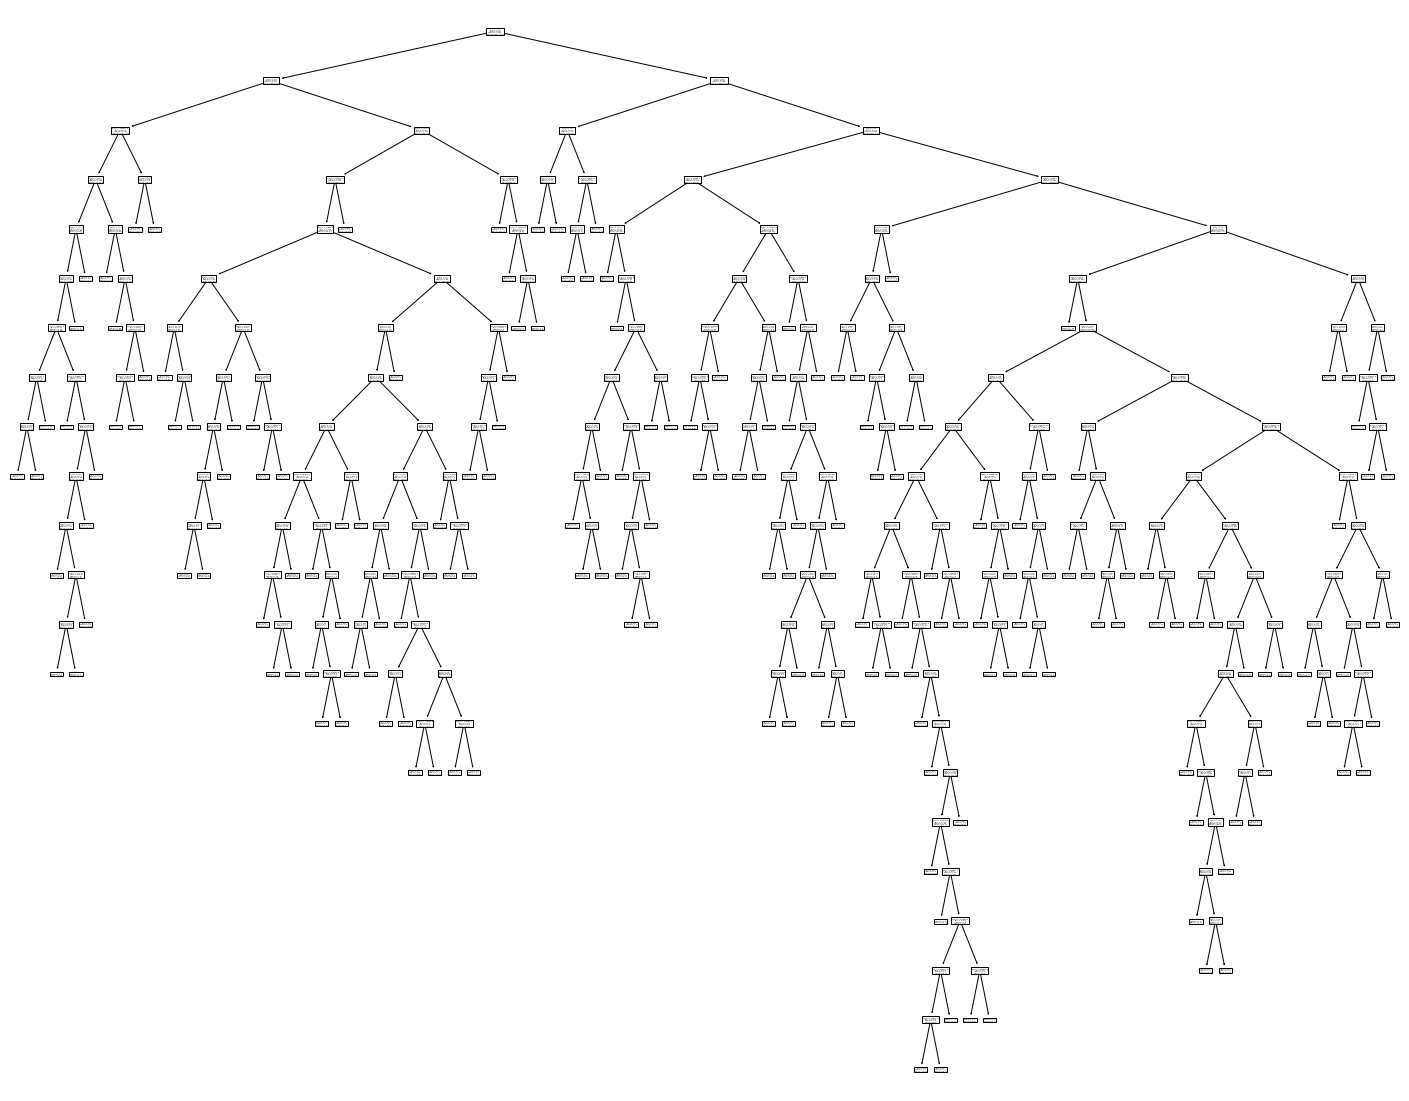

In [522]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model)

### Predict using your model
Now we will ask our model to guess values from our testing set. The model has not seen these values, so it is a good test to see how we are doing

In [523]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### Check our results
Below we are the results for our model. Our next lesson is model accuracy, so we will dive deeper then. 

In [443]:
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score

train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_accuracy = balanced_accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

print('The training accuracy is {}%'.format(train_accuracy*100))
print('The training precision is {}%'.format(train_precision*100))
print('The training recall is {}%'.format(train_recall*100))
print('The test accuracy is {}%'.format(test_accuracy * 100))
print('The test precision is {}%'.format(test_precision * 100))
print('The test recall is {}%'.format(test_recall * 100))

The training accuracy is 99.76347251271721%
The training precision is 99.69788519637463%
The training recall is 99.69788519637463%
The test accuracy is 74.56017540152156%
The test precision is 69.88636363636364%
The test recall is 72.7810650887574%


As for now how do you think we did? Could we model our data better with better features? Lets take another look with the code below. 

#### Another way to Model

We have created the code below to show you, one of the levers DecisionTreeClassifier has at its disposal. We are looping over values from 1-20 of max_depth, to show you how adjusting one of these levers can change your results. 

In [444]:
train_scores = []
test_scores = []
tree_values = [i for i in range(1, 21)]

for i in tree_values:
    # configure the model, this is where we set our lever
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    y_train_pred = model.predict(X_train)
    train_acc = balanced_accuracy_score(y_train, y_train_pred)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    y_test_pred = model.predict(X_test)
    test_acc = balanced_accuracy_score(y_test, y_test_pred)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.755, test: 0.775
>2, train: 0.740, test: 0.728
>3, train: 0.794, test: 0.793
>4, train: 0.767, test: 0.738
>5, train: 0.820, test: 0.725
>6, train: 0.831, test: 0.723
>7, train: 0.856, test: 0.743
>8, train: 0.870, test: 0.749
>9, train: 0.904, test: 0.750
>10, train: 0.919, test: 0.736
>11, train: 0.937, test: 0.744
>12, train: 0.956, test: 0.752
>13, train: 0.970, test: 0.756
>14, train: 0.982, test: 0.744
>15, train: 0.986, test: 0.748
>16, train: 0.992, test: 0.730
>17, train: 0.992, test: 0.728
>18, train: 0.993, test: 0.738
>19, train: 0.995, test: 0.741
>20, train: 0.996, test: 0.746


Here we can see how our model performed in training and testing when we moved through the different values for max_depth. As you can see our model could still use some improvement, but we are performing better than we did from lesson 4.

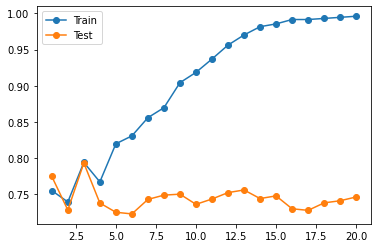

In [445]:
plt.plot(tree_values, train_scores, '-o', label='Train')
plt.plot(tree_values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

**Exercise 9**: What do you believe could make our model better?

(Double Click Here) Answer:

**Bonus**: Try to improve our model to 90% and describe what you did.

(Double Click Here) Answer:

# Congratulations Future Data Scientist/Machine Learning Engineer! 

## You've now added many awesome techniques to your toolbox. 

### You are so close to winning the grand prize!